In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model

In [ ]:
SIZE=1024

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/img/6.png', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(1024, 1024, 3)


In [ ]:
#Get image shape ready for the network
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 1024, 1024, 3)


In [ ]:
mask=cv2.imread('/content/drive/MyDrive/Colab Notebooks/img/msk1.png', 1)   #Change 1 to 0 for grey images

mask=cv2.resize(mask,(SIZE, SIZE))
print(mask.shape)

(1024, 1024, 3)


In [ ]:
#mask_array = np.expand_dims(mask, axis=2) #Grayscale image, so let us expand dim to indicate we have 1 channel
mask_array = np.expand_dims(mask, axis=0) #Expand dim along axis 0 to get it to the right shape for the network
print(mask_array.shape)

(1, 1024, 1024, 3)


In [ ]:
img_array = img_array.astype('float32') / 255.  #Scale image pixel values to between 0 and 1
mask_array = mask_array.astype('float32') / 255.  #Mask has values 0, 255 - scale them to 0 and 1.

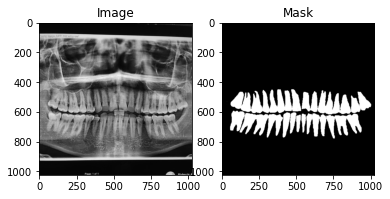

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_array[0,:,:,0], cmap='gray')
plt.title('Image')
plt.subplot(1,2,2)
plt.imshow(mask_array[0,:,:,:])
plt.title('Mask')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  #Using binary cross entropy loss. Try other losses.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1024, 1024, 64)    1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 256)     295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 256)    0

In [ ]:
model.fit(img_array, mask_array, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 224ms/step - loss: 0.3120 - accuracy: 0.3123
Epoch 2/1000
1/1 [==============================] - 0s 179ms/step - loss: 0.3106 - accuracy: 0.0236
Epoch 3/1000
1/1 [==============================] - 0s 173ms/step - loss: 0.2938 - accuracy: 0.0084
Epoch 4/1000
1/1 [==============================] - 0s 170ms/step - loss: 0.8437 - accuracy: 0.0112
Epoch 5/1000
1/1 [==============================] - 0s 172ms/step - loss: 0.4115 - accuracy: 0.0029
Epoch 6/1000
1/1 [==============================] - 0s 174ms/step - loss: 0.4240 - accuracy: 0.0022
Epoch 7/1000
1/1 [==============================] - 0s 173ms/step - loss: 0.3427 - accuracy: 0.0020
Epoch 8/1000
1/1 [==============================] - 0s 170ms/step - loss: 0.3553 - accuracy: 0.0021
Epoch 9/1000
1/1 [==============================] - 0s 169ms/step - loss: 0.3920 - accuracy: 0.0048
Epoch 10/1000
1/1 [==============================] - 0s 174ms/step - loss: 0.4044 - accuracy: 0.6862

In [ ]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 34ms/step


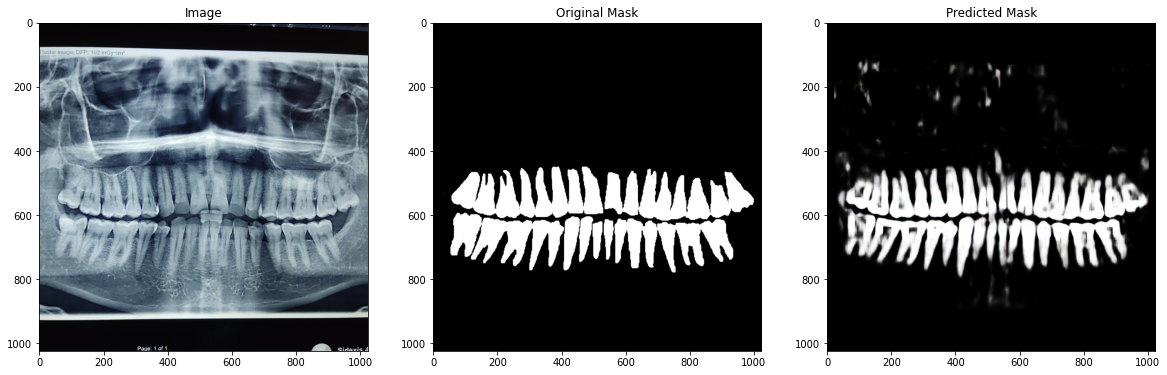

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Image')
plt.subplot(1,3,2)
plt.imshow(mask)
plt.title('Original Mask')
plt.subplot(1,3,3)
plt.imshow(pred[0,:,:,:])
plt.title('Predicted Mask')
plt.show()